In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split


data = pd.read_csv("dataset/preprocessed.csv")

data = data.drop(data.columns[0],axis=1)

In [2]:
data = data.drop(data[data.target   ==  -1].index)

In [3]:
y = data.target

X = data.drop("target",axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

print(X_train.shape)
print(X_test.shape)

(571570, 42)
(190524, 42)


In [5]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN(random_state = 52, n_jobs = -1)

X_train, y_train = sm.fit_sample(X_train ,y_train)

In [6]:
print(X_train.shape)

(295997, 42)


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [8]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(weights = "distance",metric = "minkowski",p = 1, n_jobs = -1)

k_values=[20,60,100,140,200]

for k in k_values:
    
    
    param_grid = {"n_neighbors": [k]}
    
    #gridsearch to test all values
    knn_gscv = GridSearchCV(knn, param_grid, cv = 10)
    
    #fit model
    knn_gscv.fit(X_train, y_train)
    
    score = knn_gscv.best_score_
    
    print("k Value " + str(k) + "and Score : " + str(score))


k Value 20and Score : 0.8425291507976438
k Value 60and Score : 0.8418331873885441
k Value 100and Score : 0.841039257512352
k Value 140and Score : 0.8403297905197673
k Value 200and Score : 0.8390797812745683


In [13]:
knn = KNeighborsClassifier(n_neighbors=20 ,weights = "distance", metric = "minkowski", p = 1, n_jobs = -1)
    
knn.fit(X_train,y_train)
    
predic = knn.predict(X_test)
    
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
print("Accuracy score: ", accuracy_score(y_test, predic))
print("f1 score: ", f1_score(y_test, predic, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predic, average = 'weighted'))
print("Recall score: ", recall_score(y_test, predic, average = 'weighted'))

Accuracy score:  0.3816841972664861
f1 score:  0.38435510181291777
Precision score:  0.3982320432463995
Recall score:  0.3816841972664861


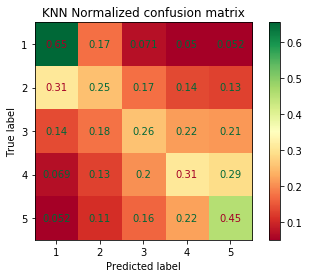

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

classes = ["1", "2", "3", "4", "5"]
title = "KNN Normalized confusion matrix"
disp = plot_confusion_matrix(knn, X_test, y_test, display_labels = classes, cmap = "RdYlGn", normalize = "true")
disp.ax_.set_title(title)
plt.show()